## Implementing CAVI - Mean Field VI - GMM

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams["figure.figsize"] = 15,7.5

In [110]:
# number of clusters - works well for 3
K = 3
np.random.seed(13)

# generate c_i as a vector
def generate_cluster_vector(K):
    vec = [0]*K
    vec[np.random.choice(range(K))] = 1
    return vec

# generate main mu
sigma = 15
mu = np.array([0.0]*K)
for i in range(K):
    mu[i] = np.random.normal(loc=0, scale=sigma)
# mu = np.linspace(-20,20,K)

# generate data
def generate_data_gmm(K, mu, size=1000):
    x_data = np.array([0.0]*size)
    y_data = np.array([0.0]*size)
    for i in range(size):
        mu_temp = sum(generate_cluster_vector(K) * mu)
        x_data[i] = np.random.normal(loc=mu_temp, scale=1, size=1)
        y_data[i] = mu_temp
        
    return x_data ,y_data   

x_data,y_data = generate_data_gmm(K,mu)

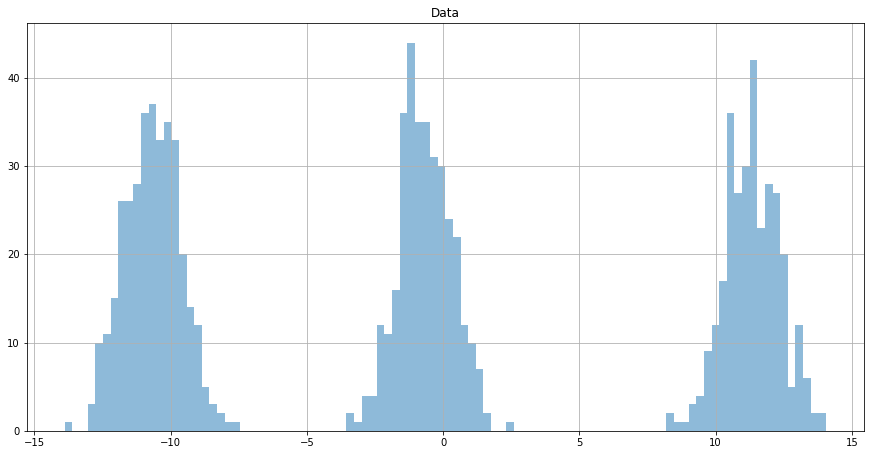

In [111]:
# data - simulated
plt.hist(x_data,bins=100,histtype="bar", alpha = 0.5)
plt.grid(True)
plt.title("Data")
plt.show()

In [112]:
def CAVI(x_data, K, prior_var = 1):
    # number of samples
    n = x_data.shape[0]
    
    # initialize m_k, s_k and c_i
    m = np.array([0.0]*K)
    s = np.array([0.0]*K)

    m_new = np.array([0.0]*K)
    s_new = np.array([0.0]*K)
    
    
    for i in range(K):
        m[i] = np.random.normal(0, prior_var)
        s[i] = abs(np.random.normal(0, prior_var))
     
    # initialize the categorical variables
    cat_var = np.zeros((n,K))
    for i in range(n):
        cat_var[i, np.random.choice(K)] = 1
    
    i = 0
    while(i < 10000):
        for i in range(n):
            cat_var[i,:] = np.exp(m*x_data[i] - (s+ m**2)/2)
            cat_var[i,:] = cat_var[i,]/np.sum(cat_var[i,])
        
        for k in range(K):
            m_new[k] = np.sum(cat_var[:,k]*x_data)/(1./(prior_var**2) + np.sum(cat_var[:,k]))
            s_new[k] = 1./(1./(prior_var**2) + np.sum(cat_var[:,k]))
        
        if np.dot((m_new - m),(m_new - m)) < 1e-8:
            break
        
        m,s = m_new,s_new 
        i += 1
    
    return m_new, s_new, i

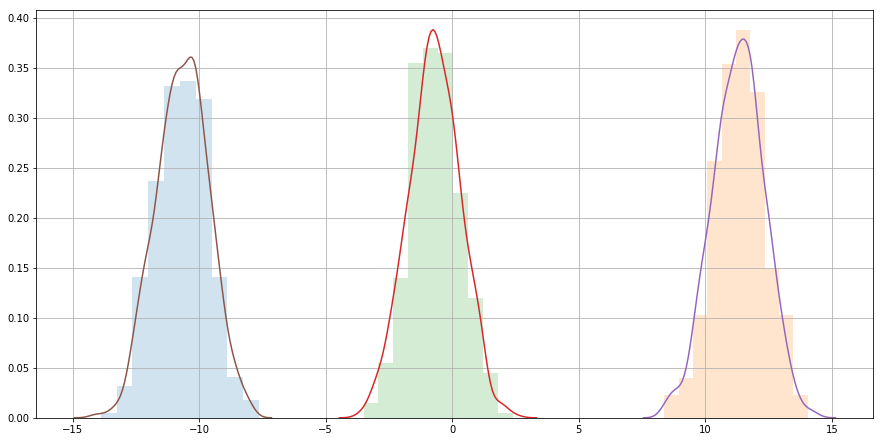

In [113]:
m,s,i = CAVI(x_data, K)

df_data = pd.DataFrame(columns=['x','y'])
df_data['x'] = x_data
df_data['y'] = y_data

for i in mu:
    plt.hist(df_data[df_data['y'] == i]['x'], alpha=0.2,density=True)
for i in range(K):
    temp = np.random.normal(loc=m[i], scale=1,size=1000)
    sns.kdeplot(data=temp)
plt.grid(True)